In [1]:
#import panda library
import pandas as pd


In [8]:
#Import csv file
houseDF=pd.read_csv("house.txt",sep="\t")

In [9]:
houseDF.head()


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [10]:
houseDF.corr(method="spearman")

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.091613,0.172455,-0.075462,0.118121,-0.055414
Price,0.091613,1.000000,0.554613,0.507379,0.506411,-0.309424
SqFt,0.172455,0.554613,1.000000,0.471628,0.509962,0.325431
Bedrooms,-0.075462,0.507379,0.471628,1.000000,0.390466,0.135805
Bathrooms,0.118121,0.506411,0.509962,0.390466,1.000000,0.171816
Offers,-0.055414,-0.309424,0.325431,0.135805,0.171816,1.000000


In [18]:
#problem Statement: Predict Price from given features
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style

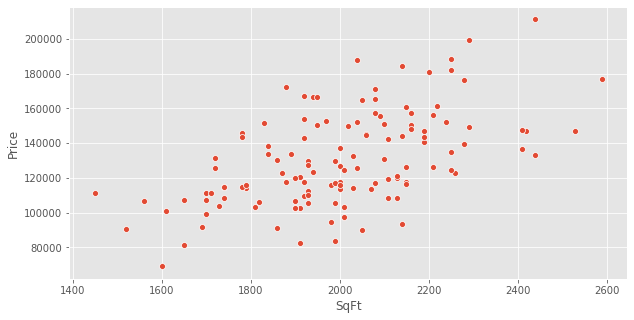

In [19]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.scatterplot(houseDF.SqFt,houseDF.Price)
plt.show()

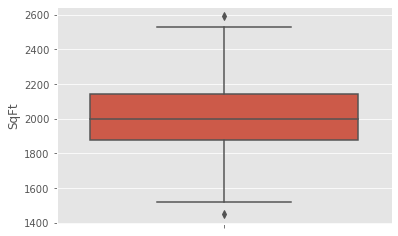

In [26]:
sns.boxplot(y=houseDF.SqFt)

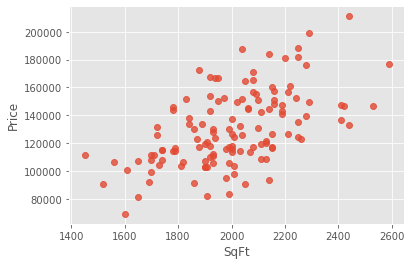

In [20]:
sns.regplot(houseDF.SqFt,houseDF.Price,fit_reg=False)
plt.show()

In [21]:
#define features and outcome variables
#building model with two features: SqFt and Bedrooms
x=houseDF[['SqFt','Bedrooms']]
y=houseDF.Price

In [22]:
#split data into train and test
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)#default test size is .25

In [24]:
print("House Shape",houseDF.shape)
print("Train Shape",x_train.shape)
print("Test Shape",x_test.shape)

House Shape (128, 8)
Train Shape (89, 2)
Test Shape (39, 2)


In [3]:
#build the model
#import model
from sklearn.linear_model import LinearRegression

In [ ]:
#create an estimator object
hModel=LinearRegression()

In [ ]:
#train the model
hModel.fit(x_train,y_train)

In [ ]:
#print coefficients and intercept
print("Model Coeff",hModel.coef_)
print("Intercept",hModel.intercept_)

In [ ]:
#check accuarcy of the model
#train dataset
hModel.score(x_train,y_train)

In [ ]:
#test dataset
hModel.score(x_test,y_test)

In [ ]:
#standardise the data and then build model
from sklearn.preprocessing import StandardScaler

In [ ]:
#creating standard scalar estimator
stdScalar=StandardScaler()

In [ ]:
stdScalar.fit(x_train)

In [ ]:
x_train_std=stdScalar.transform(x_train)

In [ ]:
x_test_std=stdScalar.transform(x_test)

In [ ]:
#build thye model with standardised values
hModel_std=LinearRegression()

In [ ]:
hModel_std.fit(x_train_std,y_train)

In [ ]:
hModel_std.score(x_train_std,y_train)

In [ ]:
hModel_std.score(x_test_std,y_test)

In [ ]:
#print coefficients and intercept
print("Model Coeff",hModel.coef_)
print("Intercept",hModel.intercept_)

In [ ]:
#print coefficients and intercept
print("Model Coeff",hModel_std.coef_)
print("Intercept",hModel_std.intercept_)

In [ ]:
###### Working with all features
#creating dummy variables
houseDF.head(1)

In [ ]:
house_dummy=pd.get_dummies(data=houseDF,columns=['Brick','Neighborhood'],drop_first=True)

In [ ]:
house_dummy.head(1)

In [ ]:
#define features and outcome
x=house_dummy.iloc[:,2:]
y=house_dummy.Price

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
#standardise the data
from sklearn.preprocessing import StandardScaler

In [ ]:
#define standardscalar estimator object
stdScalar=StandardScaler()

In [ ]:
stdScalar.fit(x_train)

In [ ]:
x_train_std=stdScalar.transform(x_train)
x_test_std=stdScalar.transform(x_test)

In [ ]:
#building model
from sklearn.linear_model import LinearRegression

In [ ]:
#defining estimator object for regression
houseModel=LinearRegression()

In [ ]:
#fit the model
houseModel.fit(x_train_std,y_train)

In [ ]:
#score: train
houseModel.score(x_train_std,y_train)

In [ ]:
#score: test
houseModel.score(x_test_std,y_test)

In [ ]:
#print coeff and intercept
print("Coeff: ",houseModel.coef_)
print("Intercept: ",houseModel.intercept_)

In [ ]:
#predicted value on train data
train_pred=houseModel.predict(x_train_std)
#on test
test_pred=houseModel.predict(x_test_std)

In [ ]:
pd.DataFrame({'ObservedValue':y_train,"PredictedValue":train_pred})

In [ ]:
import joblib

In [ ]:
joblib.dump(houseModel,"final_house_model.sav")

In [ ]:
joblib.dump(stdScalar,"stdValues.sav")

In [ ]:
#loading models and using it
regModel_for_price=joblib.load("final_house_model.sav")

In [ ]:
scaleValues=joblib.load('stdValues.sav')

In [ ]:
#checking if Home is having impact########
x=houseDF[['SqFt','Home','Bedrooms','Bathrooms']]
y=houseDF.Price

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x,y)

In [ ]:
model.coef_

In [ ]:
sns.scatterplot(houseDF.Home,houseDF.Price)

In [ ]:
houseDF[['Price','SqFt','Home']].corr()

In [ ]:
#windmill dataset
wData=pd.read_csv("windmill.csv")

In [ ]:
wData.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(wData.Speed,wData.Output)
plt.show()

In [ ]:
windMillModel=LinearRegression()

In [ ]:
windMillModel.fit(pd.DataFrame(wData.Speed),wData.Output)

In [ ]:
windMillModel.score(pd.DataFrame(wData.Speed),wData.Output)

In [ ]:
#add a new column Speed_inv=1/Speed
wData['Speed_inv']=1/wData.Speed

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(wData.Speed,wData.Output)
plt.title('Output Wrt Speed')
plt.subplot(122)
sns.scatterplot(wData.Speed_inv,wData.Output)
plt.title('Output Wrt Speed_inv')

plt.show()

In [ ]:
windMillModel_inv=LinearRegression()

In [ ]:
windMillModel_inv.fit(pd.DataFrame(wData.Speed_inv),wData.Output)

In [ ]:
windMillModel_inv.score(pd.DataFrame(wData.Speed_inv),wData.Output)

In [ ]:
#check coeff and intercept
print("#### Model with Speed ####")
print("Coeff: ",windMillModel.coef_)
print("Intercept: ",windMillModel.intercept_)

print("#### Model with Speed_inv ####")
print("Coeff: ",windMillModel_inv.coef_)
print("Intercept: ",windMillModel_inv.intercept_)

In [ ]:
#polynomial regression
x=houseDF[['SqFt','Bedrooms']]
y=houseDF.Price

In [ ]:
#creating polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polyF=PolynomialFeatures(degree=2)

In [ ]:
x_poly=polyF.fit_transform(x)

In [ ]:
#standardise values
from sklearn.preprocessing import StandardScaler

In [ ]:
stdScalar=StandardScaler()

In [ ]:
stdScalar.fit(x_poly)

In [ ]:
x_poly_std=stdScalar.transform(x_poly)

In [ ]:
#build model
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
polyModel=LinearRegression()
polyModel_ridge=Ridge(alpha=0.01)

In [ ]:
polyModel.fit(x_poly_std,y)
polyModel_ridge.fit(x_poly_std,y)

In [ ]:
print("Poly Model Score",polyModel.score(x_poly_std,y))
print("Poly Ridge Model Score",polyModel_ridge.score(x_poly_std,y))